# Bayesian Inference

### but also psychometric choice curves and how these are related (Noisy logarithmic coding model)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import os.path as op

plot_folder_path = '/Users/mrenke/Desktop/plots/BayInf_numerosities'

# for SNE 24
bids_folder = '/Users/mrenke/data/ds-dnumrisk'
plot_folder = op.join(bids_folder, 'plots_and_ims', 'poster_SNE24')

palette = sns.color_palette('coolwarm', 4)#[::-1]


In [4]:
def get_posterior(mu1, sd1, mu2, sd2):
    var1, var2 = sd1**2, sd2**2
    return mu1 + (var1/(var1+var2))*(mu2 - mu1), np.sqrt((var1*var2)/(var1+var2))

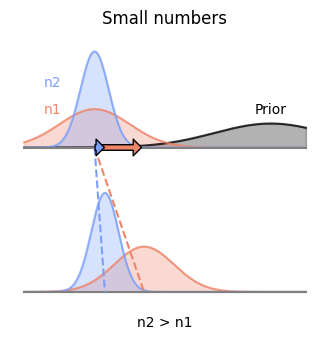

In [5]:
x = np.linspace(1.5, 5.5, 1000)

def plot_dist(mu, sd, y=0.0,color=None, shade=True, **kwargs):
    plt.plot(x, y+ss.norm(loc=mu, scale=sd).pdf(x), color=color, **kwargs, alpha=.8)
    if shade:
        plt.fill_between(x,y,y+ ss.norm(loc=mu, scale=sd).pdf(x), alpha=0.3, color=color)
    sns.despine()

mu_prior, std_prior = 5., .8

mu_n1, sd_n1 = 2.5, .5
mu_n2, sd_n2 = 2.5, .2

mu_post_n1, sd_post_n1 = get_posterior(mu_n1, sd_n1, mu_prior, std_prior)
mu_post_n2, sd_post_n2 = get_posterior(mu_n2, sd_n2, mu_prior, std_prior)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# likelihood and prior
plot_dist(mu_prior, std_prior, color='black', label='Prior')
plot_dist(mu_n1, sd_n1, color=palette[3], label='n1')
plot_dist(mu_n2, sd_n2, color=palette[0], label='n2')
plt.plot([1.5,5.5], [0,0], color='grey')

plt.axis('off')

# posterior beneath
y = -3 # y-positions
plot_dist(mu_post_n1, sd_post_n1, color=palette[3], label='n1', y=y)
plot_dist(mu_post_n2, sd_post_n2, color=palette[0], label='n2', y=y)
plt.plot([1.5,5.5], [y,y], color='grey')

# likelihood - posterior connecting lines
plt.plot([mu_n1, mu_post_n1], [0,y], color=palette[3], ls='--')
plt.plot([mu_n2, mu_post_n2], [0,y], color=palette[0], ls='--')

# annotations
x_anot_offset = 0.6 # negative when likelihood larger than prior
ax.annotate('Prior', (mu_prior, 0.65), ha='center', va='bottom')
ax.annotate('n1', (mu_n1-x_anot_offset, 0.65), ha='center', va='bottom', color=palette[3])
ax.annotate('n2', (mu_n2-x_anot_offset, 1.2), ha='center', va='bottom', color=palette[0])

# arrow
plt.annotate('', xytext=(mu_n1, 0), xy=(mu_post_n1, 0), arrowprops={"facecolor":palette[3], 'edgecolor':'k', "linewidth":1., 'shrink':0.05, 'headlength':6})
plt.annotate('', xytext=(mu_n2, 0), xy=(mu_post_n2, 0), arrowprops={"facecolor":palette[0], 'edgecolor':'k', "linewidth":1., 'shrink':0.05, 'headlength':6})


ax.set_ylim(y-1,2.4)
ax.title.set_text('Small numbers')
plt.gca().annotate('n2 > n1', (3.5, y-0.5),  ha='center', va='top')
plt.savefig(op.join(plot_folder, f'mag_bayInf_smallNumbers.pdf'), bbox_inches='tight')

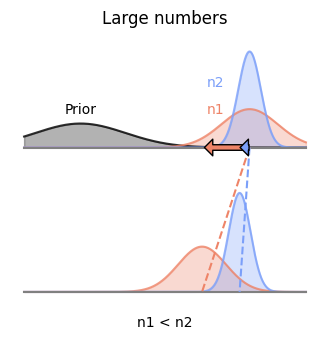

In [6]:
x = np.linspace(4, 9, 1000)

def plot_dist(mu, sd, y=0.0,color=None, shade=True, **kwargs):
    plt.plot(x, y+ss.norm(loc=mu, scale=sd).pdf(x), color=color, **kwargs, alpha=.8)
    if shade:
        plt.fill_between(x,y,y+ ss.norm(loc=mu, scale=sd).pdf(x), alpha=0.3, color=color)
    sns.despine()

mu_prior, std_prior = 5., .8

mu_n1, sd_n1 = 8, .5
mu_n2, sd_n2 = 8, .2

mu_post_n1, sd_post_n1 = get_posterior(mu_n1, sd_n1, mu_prior, std_prior)
mu_post_n2, sd_post_n2 = get_posterior(mu_n2, sd_n2, mu_prior, std_prior)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
# likelihood and prior
plot_dist(mu_prior, std_prior, color='black', label='Prior')
plot_dist(mu_n1, sd_n1, color=palette[3], label='n1')
plot_dist(mu_n2, sd_n2, color=palette[0], label='n2')
plt.plot([4, 9], [0,0], color='grey')

plt.axis('off')

# posterior beneath
y = -3 # y-positions
plot_dist(mu_post_n1, sd_post_n1, color=palette[3], label='n1', y=y)
plot_dist(mu_post_n2, sd_post_n2, color=palette[0], label='n2', y=y)
plt.plot([4, 9], [y,y], color='grey')

# likelihood - posterior connecting lines
plt.plot([mu_n1, mu_post_n1], [0,y], color=palette[3], ls='--')
plt.plot([mu_n2, mu_post_n2], [0,y], color=palette[0], ls='--')

# annotations
x_anot_offset = 0.6 # negative when likelihood larger than prior
ax.annotate('Prior', (mu_prior, 0.65), ha='center', va='bottom')
ax.annotate('n1', (mu_n1-x_anot_offset, 0.65), ha='center', va='bottom', color=palette[3])
ax.annotate('n2', (mu_n2-x_anot_offset, 1.2), ha='center', va='bottom', color=palette[0])

# arrow
plt.annotate('', xytext=(mu_n1, 0), xy=(mu_post_n1, 0), arrowprops={"facecolor":palette[3], 'edgecolor':'k', "linewidth":1., 'shrink':0.05, 'headlength':6})
plt.annotate('', xytext=(mu_n2, 0), xy=(mu_post_n2, 0), arrowprops={"facecolor":palette[0], 'edgecolor':'k', "linewidth":1., 'shrink':0.05, 'headlength':6})


ax.set_ylim(y-1,2.4)
ax.title.set_text('Large numbers')
plt.gca().annotate('n1 < n2', (6.5, y-0.5),  ha='center', va='top')
plt.savefig(op.join(plot_folder, f'mag_bayInf_largeNumbers.pdf'), bbox_inches='tight')

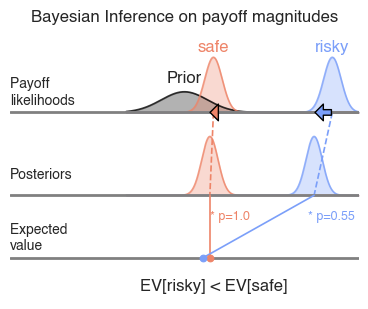

In [7]:
sns.set_theme('paper', 'white', font='helvetica', font_scale=1.25, palette='tab10')

x = np.linspace(2, 10, 1000)
mu_prior, std_prior = 4., .8
mu_n1, sd_n1 = 5, .3     # safe
mu_n2, sd_n2 = (mu_n1/0.55), .3 # risky
mu_post_n1, sd_post_n1 = get_posterior(mu_n1, sd_n1, mu_prior, std_prior)
mu_post_n2, sd_post_n2 = get_posterior(mu_n2, sd_n2, mu_prior, std_prior)


fig, ax = plt.subplots(1, 1, figsize=(4.5, 3.5))

# likelihood and prior
plot_dist(mu_prior, std_prior, color='black', label='Prior')
plot_dist(mu_n1, sd_n1, color=palette[3], label='n1')
plot_dist(mu_n2, sd_n2, color=palette[0], label='n2')
plt.axis('off')

# posterior beneath
y = -2 # y-positions
plot_dist(mu_post_n1, sd_post_n1, color=palette[3], label='n1', y=y)
plot_dist(mu_post_n2, sd_post_n2, color=palette[0], label='n2', y=y)

# likelihood - posterior connecting lines
plt.plot([mu_n1, mu_post_n1], [0,y], color=palette[3], ls='--')
plt.plot([mu_n2, mu_post_n2], [0,y], color=palette[0], ls='--')

# annotations
x_anot_offset = 0. # negative when likelihood larger than prior
y_anot_offset = 1.4
ax.annotate('Prior', (mu_prior, 0.65), ha='center', va='bottom')
ax.annotate('safe', (mu_n1-x_anot_offset,y_anot_offset), ha='center', va='bottom', color=palette[3])
ax.annotate('risky', (mu_n2-x_anot_offset, y_anot_offset), ha='center', va='bottom', color=palette[0])


# arrow
plt.annotate('', xytext=(mu_n1, 0), xy=(mu_post_n1, 0), arrowprops={"facecolor":palette[3], 'edgecolor':'black', "linewidth":1., 'shrink':0.05,'headlength':6}) #, 'headlength':6
plt.annotate('', xytext=(mu_n2, 0), xy=(mu_post_n2, 0), arrowprops={"facecolor":palette[0], 'edgecolor':'black', "linewidth":1., 'shrink':0.05,'headlength':6}) #, 'headlength':6

# gray baselines
plt.axhline(0, color='grey', lw=2)
plt.axhline(y, color='grey', lw=2)
y2 = y-1.5
plt.axhline(y2, color='grey', lw=2)

ax.annotate(f'Payoff \nlikelihoods', (-2, 0.0+0.5), ha='left', va='center',fontsize=10)
ax.annotate(f'Posteriors', (-2,y+0.5), ha='left', va='center',fontsize=10)
ax.annotate('Expected \nvalue', (-2, y2+0.5), ha='left', va='center',fontsize=10)

# last row 
ax.annotate('* p=0.55', (mu_post_n2-0.2, -2.5),  ha='left', va='center', color=palette[0],fontsize=9)
ax.annotate('* p=1.0', (mu_post_n1, -2.5),  ha='left', va='center', color=palette[3],fontsize=9)
plt.plot([mu_post_n1,mu_post_n1 ], [y,y-1.5], color=palette[3], ls='-')
plt.plot([mu_post_n2,mu_post_n2*0.55 ], [y,y-1.5], color=palette[0], ls='-')
plt.scatter([mu_post_n1], [y2], color=palette[3], zorder=10)
plt.scatter([mu_post_n2*0.55], [y2], color=palette[0], zorder=10)

plt.gca().annotate('EV[risky] < EV[safe]', (5, y-2),  ha='center', va='top')

plt.xlim(-2, 10)
plt.ylim(y-2.5, 2)
ax.title.set_text('Bayesian Inference on payoff magnitudes')
plt.savefig(op.join(plot_folder_path, f'KLWmodel_illustration_01.pdf'), bbox_inches='tight')

plt.savefig(op.join(plot_folder, f'risk_bayInf_largeStake.pdf'), bbox_inches='tight')



### Understand RNP

$$ \frac{1}{2} = \frac{1}{1+e^{\mu-\beta*x}} $$

$$
  1 = e^{\mu-\beta*x} \\
  0 = \mu-\beta*x \\
  \mu = \beta*x \\
  \mu = \beta*log(\frac{1}{RNP}) 
$$

$$   RNP = \pi = e^{-\frac{\mu}{\beta}} $$

In [65]:
def rearrange_plot(ax):
    mu_rn = np.log(1/0.55)
    ax.axvline(mu_rn, color='k', linestyle='--')
    ax.axhline(0.5, color='k', linestyle='--')
    ax.set(xticks=[],xlabel='log(risky/safe)', ylabel='Prop. chosen risky', yticks=[0.0, 0.5, 1.0])
    plt.legend()
    sns.despine()

x = np.linspace(-.8, 2, 500)
mu_rn = np.log(1/0.55)
rnp_rn = 0.55


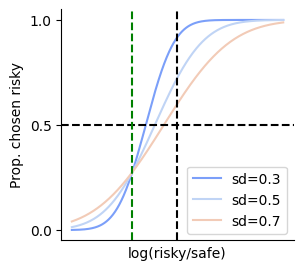

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(3,3))

for i,sd in enumerate([.3,.5,.7]):
    mu = sd *np.log(1/rnp_rn)
    d = ss.norm(mu, sd)
    ax.plot(x, d.cdf(x), color=palette[i],label=f'sd={sd}')

rearrange_plot(ax)
ax.axvline(0.0, color='green', linestyle='--')



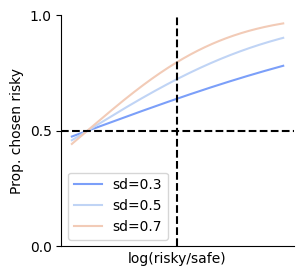

In [67]:
# Gilles version
fig, ax = plt.subplots(1, 1, figsize=(3,3))
for i,sd in enumerate([.3,.5,.7]):
    mu = sd *np.log(1/rnp_rn)
    d = ss.norm(0, 1)
    ax.plot(x, d.cdf(mu+sd*x), color=palette[i],label=f'sd={sd}')

rearrange_plot(ax)


So it is just a reparameterization

$$ 
    \beta_0 + \beta_1 * x = \frac{x-\mu}{\sigma}
$$

what we fit it $\beta_0$ + $\beta_1$, but $\mu$ is the real intercept that represents the RNP (or better said, $\frac{1}{RNP}$)

In [47]:
sds = [.3,.5,.7]
mus = [(sd *np.log(1/rnp_rn)) for sd in sds]

np.exp((mus[0]-mus[1])/(sds[1]- sds[0]))

0.55

$\sigma$ = sd prior

$\nu$ = sd evidence


$\beta = \frac{\sigma^2}{\sigma^2 + \nu^2}$

$$ 
     \mu_{diff} = \mu_{post-n2} - \mu_{post-n1} \\

     = \beta * \mu_{n2} + (1-\beta)*\mu_{prior} - (\beta * \mu_{n1} +(1-\beta)*\mu_{prior}) \\
     = \beta * (\mu_{n2} - \mu_{n1})
$$

     mu1 + (var1/(var1+var2))*(mu2 - mu1), np.sqrt((var1*var2)/(var1+var2))


In [54]:
mu_prior, std_prior = 4., .8
mu_n1, sd_n1 = 5, .3     # safe
mu_n2, sd_n2 = (mu_n1/0.55), .3 # risky
mu_post_n1, sd_post_n1 = get_posterior(mu_n1, sd_n1, mu_prior, std_prior)
mu_post_n2, sd_post_n2 = get_posterior(mu_n2, sd_n2, mu_prior, std_prior)

mu_diff = mu_post_n2 - mu_post_n1
sd_diff = np.sqrt(sd_post_n2*sd_post_n2 + sd_post_n1*sd_post_n1)

